# **Moving Average**

###Algorithm

Predicting data for every week using the actual past data and using the predicted data to calculate the remaining values for the week.

**Optimize:**  

    5*(mae_March+mae_May+mae_July)
or

    (sum_of_absolute_error_for_all_months)/num_of_weeks

### Mean Absolute Error

| Window | March   | May | July | Optimize |
|--|---------|-----|------| -------- |
|1| 11.5916 | 10.78333 | 10.09166 | 162.333 |
|**3** | **7.73408**| **7.22469**| **6.7242** | **108.415** |
| 4 | 8.21736 | 7.829215 | 7.4264811 | 117.3624 |
|5 | 8.870418| 8.449658| 7.969159 | 126.4461 |
|10 | 10.156259| 9.76012| 9.32692 | 146.2165 |

In [0]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
path = os.path.join("drive", "My Drive", "MinneMUDAC2019", "newFiles")
march = pd.read_csv(os.path.join(path,"march_new.csv"), skiprows = 3)
may = pd.read_csv(os.path.join(path,"may_new.csv"), skiprows =3)
july = pd.read_csv(os.path.join(path,"july_new.csv"),skiprows =3)

In [0]:
#Testing for july, august 2019
end_of_june2019_march= 422
end_of_june2019_may= 422
end_of_june2019_july= 674

In [0]:
#Get test and training data
def getTrainingTestingData(data, date):
  train = data[0:date]
  test = data[date:]
  return train, test

In [0]:
#Moving Average for n days 
def average(train, window):
  history = [x for x in train]
  average = 0
  for x in range(1, window+1):
    average += history[-x]
  average = average/window
  return average

In [0]:
#Moving Average algorithm to predict
#We predict for each week
def moving_average(data, div, window):
  predictions = []
  error_day = [0, 0, 0, 0, 0]
  weeks = 16
  num_days_week=5
  total = 0
  for x in range(weeks):
    train = data[0:div]
    history = [y for y in train]
    pred_week = []
    week_abs = 0;
    test = [y for y in data[div:div+num_days_week]]
    for y in range(num_days_week):
      predicted = average(history, window)
      pred_week.append(predicted)
      history.append(predicted)
      if x != 15:
        week_abs = week_abs + abs(predicted - test[y])
        error_day[y] = error_day[y] + (predicted-test[y])
    
    if x == 15:
      print("Week ", 15, " Pred: ", pred_week)
      predictions.extend(pred_week)
      print()
      break
    mae = mean_absolute_error(test, pred_week)
    total += week_abs
    print("Test: ", test)
    print("Pred: ", pred_week)
    error = [pred_week[z]-test[z] for z in range(num_days_week)]
    print("Error: ", error)
    print("Week ", x, " Total absolute sum ", week_abs)
    print()
    predictions.extend(pred_week)
    div+=num_days_week
  print("Weekday average error")
  for x in range(num_days_week):
    print(x, error_day[x]/weeks)
  print("Month average: ", total)
  return predictions, total

In [0]:
#Plotting 
def plot_Moving_Average(month, test, predictions, train, window):
  plt.title('{} Moving Average Predictions'.format(month))
  #plt.plot(train, color="blue", label="Train prices")
  plt.plot(test.index, test, color="green", label="Test prices")
  plt.plot(test.index, predictions, color="red", label="Predicted prices")
  plt.legend(loc='best')
  plt.show()

In [0]:
#expoting data to csv
def moveToCSV(pre, testval, filename):
  predictions = list(pre)
  test = list(testval)
  error = [0] * len(predictions)
  print("lentest: ", len(test), len(predictions))
  for x in range(len(test)):
    error[x] = (predictions[x]-test[x])
  for x in range(5):
    test.append(0)
  df = pd.DataFrame({'Test':test, 'Predictions':predictions, 'Error': error})
  df.to_csv(filename, sep=',', encoding='utf-8')

In [0]:
#Data for each month
def each_month(month, data, div, window, filename):
  train, test = getTrainingTestingData(data, div)
  train = train['Close']
  test = test['Close']
  predictions, total= moving_average(data['Close'], div, window)

  moveToCSV(predictions, test, filename)
  print("Mean Absolute Error for {}: ".format(month), mean_absolute_error(predictions[0:-5], test))
  plot_Moving_Average(month, test, predictions[0:-5], train, window)
  return total

In [0]:
window = 3

Test:  [928.25, 926.25, 931.0, 924.5, 925.75]
Pred:  [928.0833333333334, 929.9444444444445, 932.8425925925926, 930.2901234567902, 931.0257201646091]
Error:  [-0.16666666666662877, 3.694444444444457, 1.8425925925926094, 5.790123456790184, 5.275720164609083]
Week  0  Total absolute sum  16.769547325102963

Test:  [929.25, 922.25, 908.5, 891.75, 894.25]
Pred:  [927.0833333333334, 925.7777777777778, 926.2037037037038, 926.3549382716051, 926.1121399176956]
Error:  [-2.1666666666666288, 3.5277777777778283, 17.70370370370381, 34.60493827160508, 31.862139917695572]
Week  1  Total absolute sum  89.86522633744892

Test:  [893.75, 890.75, 891.75, 907.5, 916.0]
Pred:  [898.1666666666666, 894.7222222222222, 895.7129629629629, 896.2006172839506, 895.5452674897119]
Error:  [4.416666666666629, 3.9722222222221717, 3.9629629629629335, -11.299382716049422, -20.454732510288068]
Week  2  Total absolute sum  44.105967078189224

Test:  [905.25, 914.0, 903.75, 897.0, 906.5]
Pred:  [905.0833333333334, 909.5277

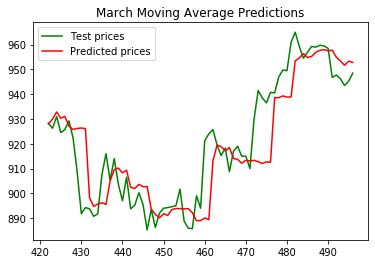

In [15]:
#March
march_total = each_month("March", march, end_of_june2019_march, window, "march_MA.csv")

Test:  [937.0, 935.25, 940.5, 934.5, 935.75]
Pred:  [936.5833333333334, 938.4444444444445, 941.2592592592592, 938.7623456790124, 939.488683127572]
Error:  [-0.41666666666662877, 3.194444444444457, 0.7592592592592382, 4.2623456790123555, 3.738683127572017]
Week  0  Total absolute sum  12.371399176954696

Test:  [939.0, 933.25, 920.5, 903.5, 905.75]
Pred:  [936.9166666666666, 935.7222222222222, 936.1296296296296, 936.2561728395061, 936.0360082304527]
Error:  [-2.0833333333333712, 2.4722222222221717, 15.629629629629562, 32.75617283950612, 30.286008230452694]
Week  1  Total absolute sum  83.22736625514392

Test:  [905.25, 902.0, 903.0, 918.5, 927.0]
Pred:  [909.9166666666666, 906.3888888888888, 907.3518518518518, 907.8858024691358, 907.2088477366254]
Error:  [4.666666666666629, 4.3888888888888005, 4.351851851851848, -10.614197530864203, -19.791152263374556]
Week  2  Total absolute sum  43.812757201646036

Test:  [917.0, 925.25, 915.0, 908.25, 917.5]
Pred:  [916.1666666666666, 920.555555555

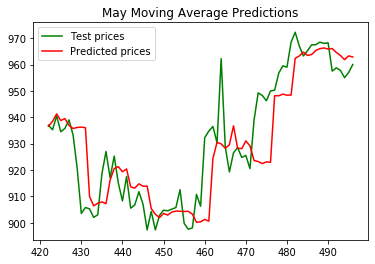

In [0]:
#May
may_total = each_month("May", may, end_of_june2019_may, window, "may_MA.csv")

Test:  [945.5, 944.25, 949.25, 943.75, 945.25]
Pred:  [944.9166666666666, 946.7222222222222, 949.3796296296296, 947.0061728395061, 947.7026748971193]
Error:  [-0.5833333333333712, 2.4722222222221717, 0.12962962962956226, 3.256172839506121, 2.452674897119323]
Week  0  Total absolute sum  8.894032921810549

Test:  [948.75, 944.0, 931.75, 915.25, 917.25]
Pred:  [946.0833333333334, 945.0277777777778, 945.4537037037038, 945.5216049382717, 945.3343621399177]
Error:  [-2.6666666666666288, 1.0277777777778283, 13.703703703703809, 30.271604938271707, 28.084362139917744]
Week  1  Total absolute sum  75.75411522633772

Test:  [916.75, 913.5, 913.75, 929.0, 937.25]
Pred:  [921.4166666666666, 917.9722222222222, 918.8796296296296, 919.4228395061727, 918.7582304526749]
Error:  [4.666666666666629, 4.472222222222172, 5.129629629629562, -9.57716049382725, -18.491769547325134]
Week  2  Total absolute sum  42.33744855967075

Test:  [927.75, 935.75, 925.75, 919.0, 928.0]
Pred:  [926.6666666666666, 930.97222

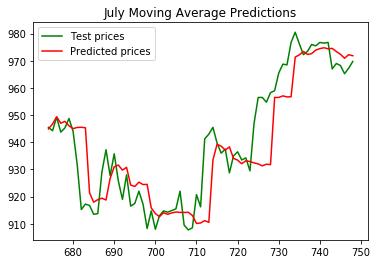

In [0]:
#July
july_total = each_month("July", july, end_of_june2019_july, window, "july_MA.csv")

In [0]:
#Optimization
(may_total + march_total + july_total)/15

123.2696502057613